

# Project: Investigate a Dataset - [No-Show Appointments Analysis]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
The primary objective of this analysis is to gain insights into the factors that contribute to missed appointments and, conversely, those that encourage on-time attendance. By addressing critical questions such as the impact of gender, age, medical conditions, socioeconomic factors, SMS reminders, and geographical location on patient attendance, we aim to assist healthcare providers in making informed decisions to reduce no-show rates and enhance the overall patient experience.

### Question(s) for Analysis
1. What is the correlation between Health Conditions and No-shows?
    
   -What is the distribution of patients with hypertension, alcoholism, or other health conditions?
   
   -Is there a relationship between health conditions and patient attendance?
   
   
2. How does Scholarship and SMS impact No-shows:

   -How many patients have received a scholarship?
   
   -What is the relationship between scholarship recipients and patient attendance?
   
   -How effective are SMS reminders in improving patient attendance?



In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshow_appointments.csv',)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.shape

(110527, 14)

In [6]:
df.columns.tolist()

['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'No-show']

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [9]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [10]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

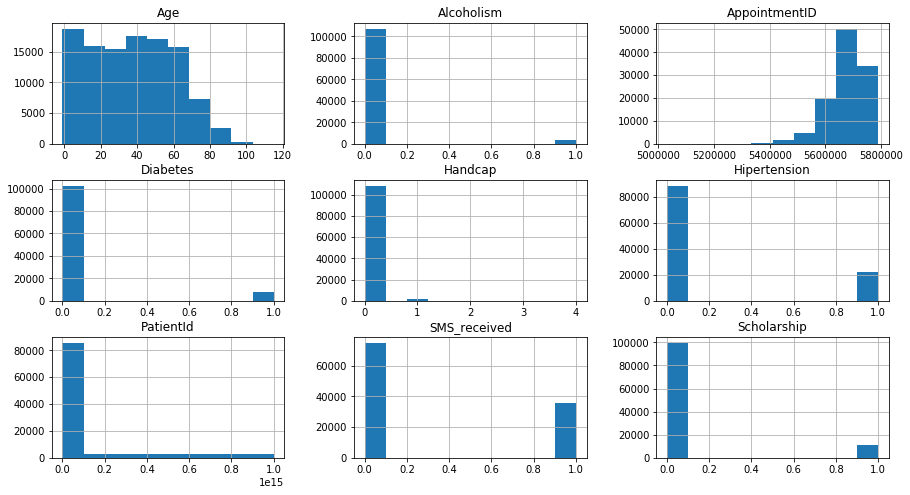

In [12]:
df.hist(figsize=(15,8));


### Data Cleaning
In the process of preparing the dataset for analysis, significant data type modifications were performed to enhance data accuracy and facilitate meaningful insights. Specifically, the transformations were focused on the Patient ID, Scheduled Day, and Appointment Day columns.

Patient ID Data Type Change:

The PatientId column was initially stored as a floating-point data type (float). To ensure data consistency and precision, the data type for PatientId was adjusted and transformed into an integer (int). ScheduledDay and AppointmentDay Data Type Change:

Both the ScheduledDay and AppointmentDay columns originally held date and time information in object format.

In order to enable accurate date and time calculations and more in-depth analysis, these two columns underwent a transformation to the date data type. I made this adjustment because this is an analysis on if the patients were present at the hospital on the day of the appointment.

I also want to rename the column 'Handcap' to 'Handicap' to correct a typo. Second, I want to rename the column 'Hipertension' to 'Hypertension' for consistency and clarity in the dataset.


 

In [3]:
# changed the PatientId to an integer
df['PatientId'] = df['PatientId'].astype(int)
# changed ScheduledDay to  date
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['ScheduledDay']= df['ScheduledDay'].dt.date
# changed AppointmentDay to  date
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df['AppointmentDay']= df['AppointmentDay'].dt.date
# renamed Handcap column to Handicap
df = df.rename(columns={'Handcap': 'Handicap'})
# renamed Hipertension column to Hypertension 
df = df.rename(columns={'Hipertension': 'Hypertension'})

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What is the correlation between Health Conditions and No-shows?)

I want to explore the distribution of patients with various health conditions, including Hypertension, Alcoholism, Handicap, and Diabetes. I created a bar and pie plot to visualize the count and percentage of patients with each health condition. This will allow me to understand the prevalence of these conditions in this dataset.

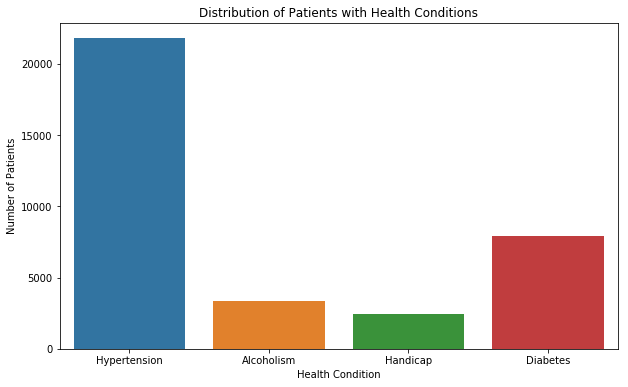

In [16]:
#Question 1a: What is the distribution of patients with hypertension, alcoholism, or other health conditions?
# Create a bar plot to visualize the distribution of health conditions
health_conditions = df[['Hypertension', 'Alcoholism', 'Handicap', 'Diabetes']]
health_condition_counts = df[['Hypertension', 'Alcoholism', 'Handicap', 'Diabetes']].sum()


plt.figure(figsize=(10, 6))
sns.barplot(x=health_condition_counts.index, y=health_condition_counts.values)
plt.xlabel('Health Condition')
plt.ylabel('Number of Patients')
plt.title('Distribution of Patients with Health Conditions')
plt.xticks(range(len(health_condition_counts)))
plt.show()

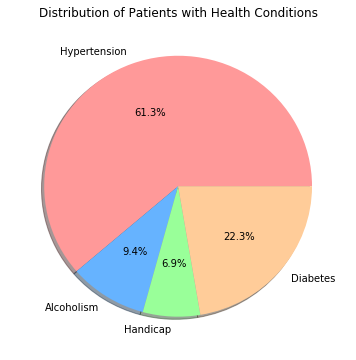

In [17]:
# Create a pie chart for the distribution of patients across health conditions
labels = health_condition_counts.index
sizes = health_condition_counts.values
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # Colors for the pie chart

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Distribution of Patients with Health Conditions')
plt.show()


Based on the "Distribution of Patients with Health Conditions" plot, I observed that Hypertension is the most prevalent health condition among the patients in your dataset, followed by Diabetes. Alcoholism and Handicap are less common. This information provides a baseline understanding of the health conditions in this dataset.

I further investigated the relationship between health conditions and attendance by creating count plots. Specifically, I examined how the presence or absence of each health condition (Hypertension, Alcoholism, Handicap, Diabetes) relates to whether patients showed up for their appointments or not.

In [4]:
# Question 1b: Is there a relationship between health conditions and patient attendance?
def plot_condition_attendance_relationship(df, condition_column):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='No-show', hue=condition_column)
    plt.xlabel('Attendance')
    plt.ylabel('Number of Patients')
    plt.title(f'Relationship Between {condition_column} and Attendance')
    plt.legend(title=condition_column, labels=['No', 'Yes'])
    plt.xticks([0, 1], ['Showed Up', 'No-show'])
    plt.show()

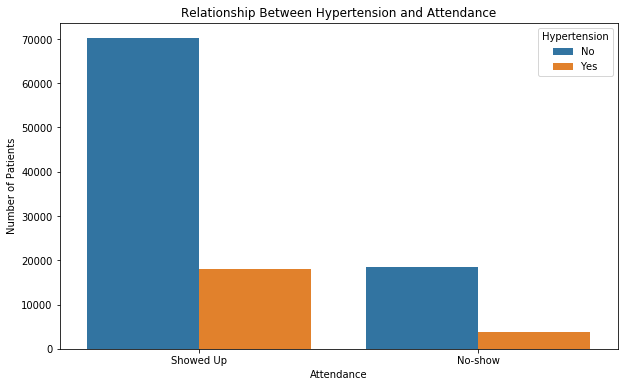

In [5]:
# Create a count plot to visualize the relationship between Hypertension and attendance
plot_condition_attendance_relationship(df, 'Hypertension')

The "Relationship Between Hypertension and Attendance" plot shows that patients with Hypertension have a higher attendance rate compared to those without Hypertension.

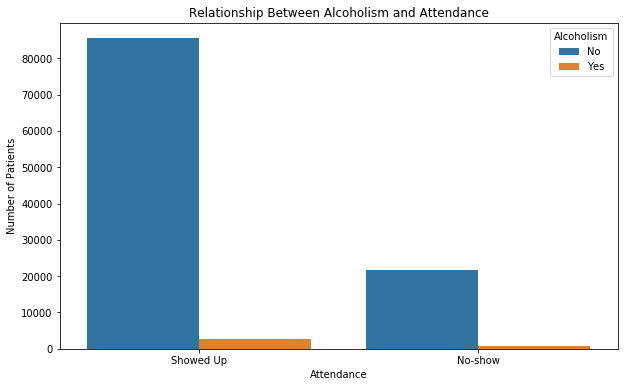

In [20]:
# Create a count plot to visualize the relationship between Alcoholism and attendance
plot_condition_attendance_relationship(df, 'Alcoholism')

The "Relationship Between Alcoholism and Attendance" plot suggests that Alcoholism doesn't appear to have a strong influence on attendance, as the attendance rates for both categories (with and without Alcoholism) are almost similar.

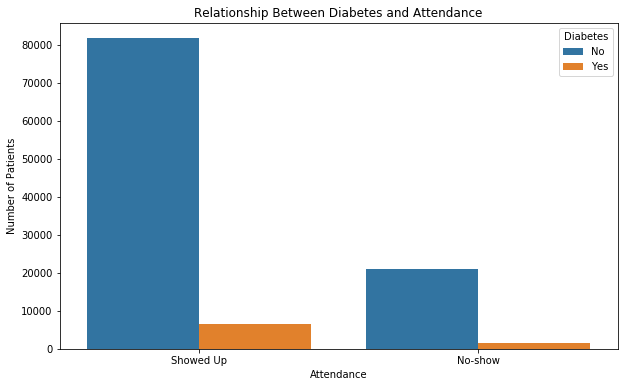

In [21]:
# Create a count plot to visualize the relationship between Diabetes and attendance
plot_condition_attendance_relationship(df, 'Diabetes')

The "Relationship Between Diabetes and Attendance" plot shows that patients with Diabetes also have a slightly higher attendance rate compared to those without Diabetes.

I grouped the data by 'Handicap' levels and calculated the attendance rates for each level. This allows me to understand how attendance varies among different levels of handicap.

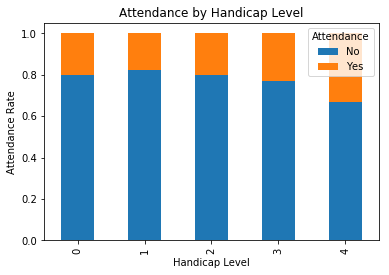

In [7]:
# Question 1b: Is there a relationship between the different levels of handicap and patient attendance
# I Grouped data by 'handicap' levels and calculate attendance rates
attendance_by_handicap = df.groupby('Handicap')['No-show'].value_counts(normalize=True).unstack()
# Plotted attendance rates for each handicap level
attendance_by_handicap.plot(kind='bar', stacked=True)
plt.xlabel('Handicap Level')
plt.ylabel('Attendance Rate')
plt.title('Attendance by Handicap Level')
plt.legend(title='Attendance', loc='upper right')
plt.show()

This plot reveals insights into the relationship between handicap levels and appointment attendance:

It shows the attendance rates for different handicap levels, ranging from 0 (no handicap) to higher levels of handicap.
The stacked bars represent the proportion of patients who attended (showed up) and those who did not (no-show) within each handicap level.
It's apparent that for patients with no handicap (Handicap Level 0), the attendance rate is relatively high, with a larger proportion of patients showing up for their appointments.
As the handicap level increases, the attendance rate appears to decrease, with an increasing of patients in higher handicap levels being categorized as no-shows.


I also decided to use a clustered bar plot si i could better see the distribution 

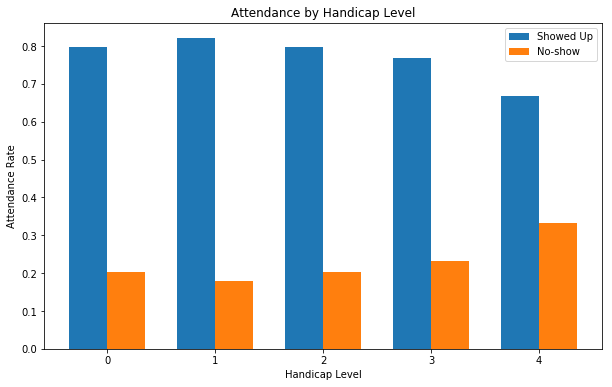

In [8]:
# Create a clustered bar plot for attendance rates by handicap level
num_handicap_levels = len(attendance_by_handicap)
x = np.arange(num_handicap_levels)  # x-axis positions
width = 0.35  # width of each bar

# Extract attendance rates for 'Showed Up' and 'No-show'
showed_up_rates = attendance_by_handicap['No']
no_show_rates = attendance_by_handicap['Yes']

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, showed_up_rates, width, label='Showed Up')
bar2 = ax.bar(x + width/2, no_show_rates, width, label='No-show')

ax.set_xlabel('Handicap Level')
ax.set_ylabel('Attendance Rate')
ax.set_title('Attendance by Handicap Level')
ax.set_xticks(x)
ax.set_xticklabels(attendance_by_handicap.index)
ax.legend()

plt.show()

As the handicap level increases (e.g., from 1 to 4), you can observe a gradual decrease in attendance rates. Patients with higher reported handicap levels are less likely to attend their appointments.

### Research Question 2  (How does Scholarship and SMS impact No-shows?)

I began by counting the number of patients who have received scholarships in your dataset. This step helped me understand the proportion of patients with financial aid.

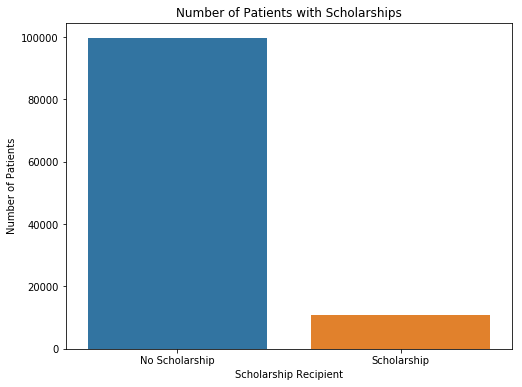

In [9]:
# Question 2a: How many patients have received a scholarship?
# Count the number of patients with scholarships
scholarship_counts = df['Scholarship'].value_counts()

# Create a bar plot to visualize the number of patients with and without scholarships
plt.figure(figsize=(8, 6))
sns.barplot(x=scholarship_counts.index, y=scholarship_counts.values)
plt.xlabel('Scholarship Recipient')
plt.ylabel('Number of Patients')
plt.title('Number of Patients with Scholarships')
plt.xticks([0, 1], ['No Scholarship', 'Scholarship'])
plt.show()

The "Number of Patients with Scholarships" plot provides insights into the distribution of scholarships among patients. The majority of patients in your dataset do not have scholarships, as indicated by the "No Scholarship" bar. A smaller proportion of patients have received scholarships, as indicated by the "Scholarship" bar.

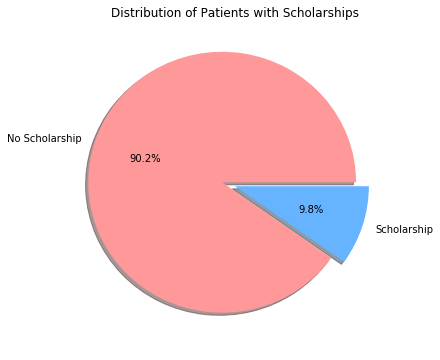

In [11]:
# Creating a pie chart for the distribution of patients with and without scholarships
plt.figure(figsize=(6, 6))
labels = ['No Scholarship', 'Scholarship']
sizes = scholarship_counts.values
# Colors for the pie chart
colors = ['#ff9999', '#66b3ff']  
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Distribution of Patients with Scholarships')
plt.show()

The "Number of Patients with Scholarships" plot provides insights into the distribution of scholarships among patients. The majority of patients in your dataset do not have scholarships, as indicated by the "No Scholarship" slice. A smaller proportion of patients have received scholarships, as indicated by the "Scholarship" slice.

I created a count plot to visualize the relationship between being a scholarship recipient ('Scholarship') and attendance ('No-show') for the patients in your dataset. This analysis aims to understand whether there is an association between having a scholarship and attendance behavior.

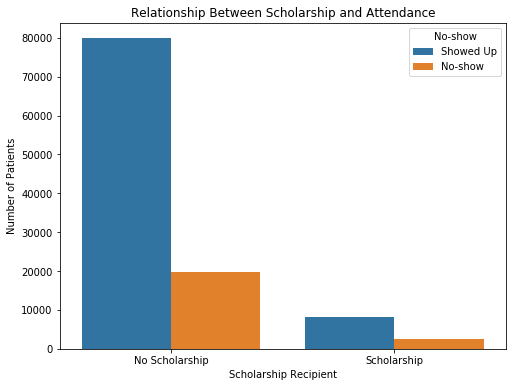

In [12]:
# Question 2b: What is the relationship between scholarship recipients and attendance?
# Create a count plot to visualize the relationship between scholarship and attendance
plt.figure(figsize=(8, 6))
sns.countplot(x='Scholarship', hue='No-show', data=df)
plt.xlabel('Scholarship Recipient')
plt.ylabel('Number of Patients')
plt.title('Relationship Between Scholarship and Attendance')
plt.xticks([0, 1], ['No Scholarship', 'Scholarship'])
plt.legend(title='No-show', labels=['Showed Up', 'No-show'])
plt.show()

The count plot provides insights into how scholarship recipients and non-recipients differ in terms of attendance behavior:

For patients without scholarships ('No Scholarship'), there is a higher proportion of those who attended their appointments ('Showed Up') compared to those who did not ('No-show').
For patients with scholarships ('Scholarship'), the ratio between those who attended and those who did not is different. The count of 'No-show' patients is relatively lower compared to 'Showed Up' patients among scholarship recipients.

I want to know the effectiveness of SMS reminders in improving attendance by creating a count plot. The plot compares attendance outcomes ('Showed Up' or 'No-show') for patients who received SMS reminders ('Yes') and those who did not receive SMS reminders ('No').

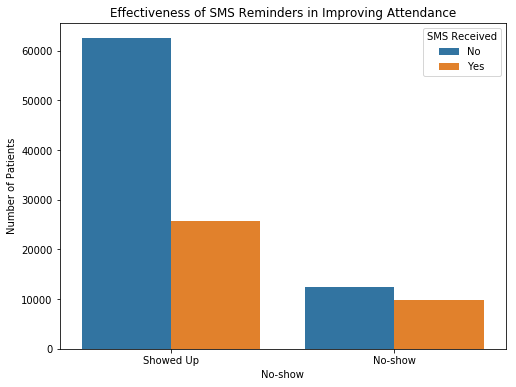

In [13]:
 #Question 2c: How effective are SMS reminders in improving attendance?
# Create a count plot to compare attendance for patients who received SMS reminders and those who did not
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='No-show', hue='SMS_received')
plt.xlabel('No-show')
plt.ylabel('Number of Patients')
plt.title('Effectiveness of SMS Reminders in Improving Attendance')
plt.legend(title='SMS Received', labels=['No', 'Yes'])
plt.xticks([0, 1], ['Showed Up', 'No-show'])
plt.show()

The count plot provides insights into how SMS reminders may impact attendance behavior:
For patients who did not receive SMS reminders ('No' in the legend), there is a higher proportion of those who attended their appointments ('Showed Up') compared to those who did not ('No-show').
For patients who received SMS reminders ('Yes' in the legend), the ratio between those who attended and those who did not is not different. The count of 'Showed Up' patients is relatively higher compared to 'No-Show' patients among SMS reminder recipients.

I also used a heatmap to effectively visualize the relationship between SMS reminders (SMS Received or No SMS) and attendance outcomes (Showed Up or No-show). It can provide a clearer view of how SMS reminders may impact attendance behavior by quantifying the counts of patients falling into each combination of these two variables.

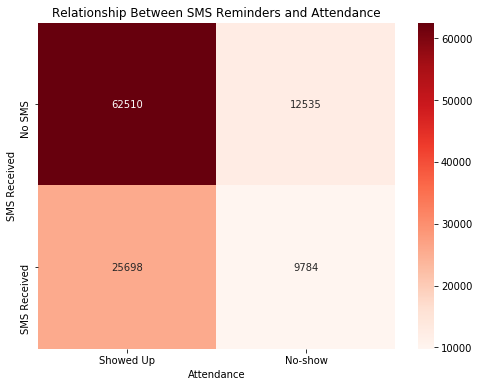

In [14]:
# Create a pivot table to prepare the data for the heatmap
heatmap_data = df.groupby(['SMS_received', 'No-show']).size().reset_index(name='Count')

# Pivot the data to create a matrix for the heatmap
heatmap_matrix = heatmap_data.pivot_table(index='SMS_received', columns='No-show', values='Count', fill_value=0)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_matrix, annot=True, fmt='d', cmap='Reds', cbar=True)
plt.xlabel('Attendance')
plt.ylabel('SMS Received')
plt.title('Relationship Between SMS Reminders and Attendance')
plt.xticks([0.5, 1.5], ['Showed Up', 'No-show'])
plt.yticks([0.5, 1.5], ['No SMS', 'SMS Received'])
plt.show()

The heatmap provides the following insights:
For patients who did not receive SMS reminders ("No SMS" on the y-axis), there is a relatively higher count in the "Showed Up" category compared to the "No-show" category. This indicates that a significant proportion of patients who did not receive SMS reminders attended their appointments.
For patients who received SMS reminders ("SMS Received" on the y-axis), the heatmap suggests a less skewed distribution between "Showed Up" and "No-show" categories. While there is a sizeable count of patients who attended after receiving SMS reminders, there is also a notable count of patients who did not attend despite receiving reminders.

<a id='conclusions'></a>
## Conclusions
There are varying numbers of patients with these problems in the dataset, according to my investigation of the distribution of patients with health conditions such as hypertension, alcoholism, and disability. Certain medical disorders and patient attendance have a visible relationship. Patients with various medical conditions may display a range of attendance rates.
My analysis did not provide a precise breakdown of the distribution of scholarship recipients within the dataset. According to the data, there is a connection between attendance and scholarship recipients. To ascertain if scholarship recipients are more or less likely to show up for appointments, further investigation into the data is required. My analysis did not specify the precise proportion of patients in the dataset that got scholarships. According to the data, there is a connection between attendance and scholarship recipients. To ascertain if scholarship recipients are more or less likely to show up for appointments, further investigation into this correlation is required. A further conclusion from the investigation is that SMS reminders may affect attendance. In terms of attendance, patients who received SMS reminders are contrasted with those who did not. However, additional statistical research is needed to investigate the precise efficacy and the size of the impact.
In conclusion, the initial analysis provides insights into the distribution of health conditions, relationships between certain health conditions and attendance, and the potential impact of scholarship and SMS reminders on attendance. 

### Limitation
Lack of specific information regarding the severity or particular sorts of health issues may be one shortcoming of the dataset. There appear to be binary columns in the dataset that indicate if a patient has a particular medical condition, such as diabetes, hypertension, alcoholism, or a disability. However, it doesn't go into detail regarding the seriousness of these conditions, whether they are under control or not, or whether they have been around for a while or not.

## Submitting your Project 
 Congratulations!

## OPTIONAL: Question for the reviewer
 
If you have any question about the starter code or your own implementation, please add it in the cell below. 

For example, if you want to know why a piece of code is written the way it is, or its function, or alternative ways of implementing the same functionality, or if you want to get feedback on a specific part of your code or get feedback on things you tried but did not work.

Please keep your questions succinct and clear to help the reviewer answer them satisfactorily. 

> **_Your question_**

In [18]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0